In [8]:
using ModelingToolkit, DifferentialEquations

@parameters r_GP1 Vf_PFK C_ATP K_f6p K_ATP Vr_PFK C_ADP K_f16bp K_ADP r_ALD
@variables t f6p(t) f16bp(t)
D = Differential(t)

#=
eqs = [D(f6p) ~ r_GP1 - r_PFK - r_PFK2 + r_F26BPase,
    D(f16bp) ~ r_PFK - r_ALD,
    D(f26bp) ~ r_PFK2 - r_F26BPase]
=#

#rates = [(r_PFK ~ Vf_PFK*C_ATP*f6p/(K_f6p*K_ATP) - Vr_PFK*C_ADP*f16bp/(K_f16bp*K_ADP))/((1+f6p/K_f6p)*(1+C_ATP/K_ATP)+(1+f16bp/K_f16bp)*(1+C_ADP/K_ADP)-1)]
r_PFK = (Vf_PFK*C_ATP*f6p/(K_f6p*K_ATP) - Vr_PFK*C_ADP*f16bp/(K_f16bp*K_ADP))/((1+f6p/K_f6p)*(1+C_ATP/K_ATP)+(1+f16bp/K_f16bp)*(1+C_ADP/K_ADP)-1)


eqs = [D(f6p) ~ r_GP1 - r_PFK,
    D(f16bp) ~ r_PFK - r_ALD]

@named sys = ODESystem(eqs, t)


Model sys with 2 equations
Unknowns (2):
  f6p(t)
  f16bp(t)
Parameters (10):
  K_f16bp
  K_ATP
  K_ADP
  r_GP1
⋮

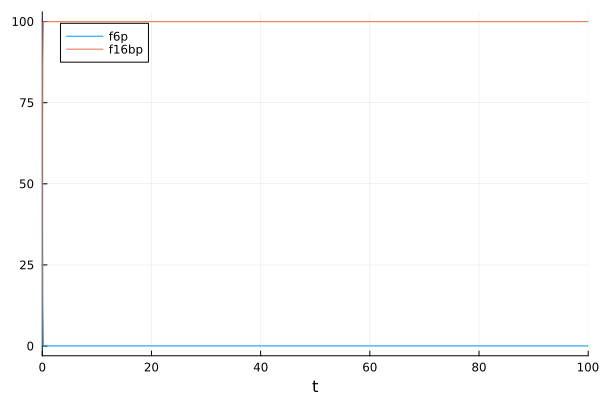

In [13]:
sys=structural_simplify(sys)

u0 = [f6p => 100,
    f16bp => 0.1]
p = [r_GP1 => 0.9,
    Vf_PFK => 1550, 
    C_ATP => 0.1, 
    K_f6p => 0.06, 
    K_ATP => 0.068,
    Vr_PFK => 67.8, 
    C_ADP => 0.1, 
    K_f16bp => 0.65, 
    K_ADP => 0.54, 
    r_ALD => 0.9]

tspan = (0.0, 100)
prob = ODEProblem(sys, u0, tspan, p, jac = true)
sol = solve(prob)

using Plots
plot(sol)